<a href="https://colab.research.google.com/github/dimasarz/twitter-sentiment-analysis/blob/master/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install tweepy # Akses Twitter API

In [3]:
pip install pandas # Pengolahan Data

In [4]:
pip install numpy # Melakukan Perhitungan

In [5]:
pip install IPython # Menampilkan Tabel

In [6]:
pip install TextBlob # Perhitungan Sentimen Dalam Bahasa Inggris

In [7]:
pip install matplotlib # Menampilkan Grafik

In [0]:
import tweepy
# Melakukan Koneksi

CONSUMER_KEY    = 'hOuhpkzRfSODwzH0uZVzef1aH'
CONSUMER_SECRET = 'OOjFIP8nn24X3Rjgv9MvvvMJoygxUXDq2XadRqxUEWhb9dWeWC'

ACCESS_TOKEN  = '1140531101032570885-DSIOqA5HIMlH3GM1jJoDpFY3QtLjLD'
ACCESS_SECRET = 'vwjJbdEczVz3ayeiCHQ6nCknzA1itKAVI2ZCAclhTWcQ3'

def twitter_init():

    # Melakukan Autentikasi
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Mengembalikan Response
    api = tweepy.API(auth)
    return api

In [0]:
from textblob import TextBlob
import re

# Tokenisasi
def tokenisasi(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    analysis = TextBlob(tokenisasi(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [0]:
import matplotlib.pyplot as plt

def showPieChart(positive,neutral,negative):
    labels = 'Positive', 'Neutral', 'Negative'
    color = ['yellowgreen','gray','lightcoral']
    value = [positive, neutral, negative]
    explode = (0.1, 0.1, 0.1)
    plt.pie(value,autopct='%1.1f%%',colors=color, labels=labels , shadow= True,explode = explode , startangle=140)
    plt.show()

Jumlah Tweet: 100.



,Tweets,length,ID,Date,Source,Likes,RTs,SA
0,wibu after 12 years:\nyokattaa linght-san\nme:...,90,1214161110133161984,2020-01-06 12:25:41,Twitter for Android,0,0,0
1,damn i miss my 24/7 happiest time being wibu a...,54,1214155522535854082,2020-01-06 12:03:29,Twitter for iPhone,0,0,0
2,fuck kpop imma back to my wibu agenda https://...,61,1214147892929150976,2020-01-06 11:33:10,Twitter for Android,0,0,-1
3,Like can yall imagine that i was a kpopers and...,86,1214146453972512768,2020-01-06 11:27:27,Twitter for iPhone,0,0,0
4,what the fuck wibu dont interact,32,1214089316252520448,2020-01-06 07:40:24,Twitter for iPhone,0,0,-1
...,...,...,...,...,...,...,...,...
95,am i gonna get married on this decade or just ...,89,1212348102151028737,2020-01-01 12:21:26,Twitter for Android,0,0,1
96,omg i watched them all. i confirmed i myself a...,88,1212332259522400258,2020-01-01 11:18:29,Twitter for iPhone,2,0,1
97,"aduh ChaCha,,wibu kesayangan gw...gue sayang l...",140,1212307364109381632,2020-01-01 09:39:33,Twitter for Android,0,0,0
98,Nov 2019 stands out because I only draw in my ...,72,1212292949834231809,2020-01-01 08:42:17,Twitter for Android,0,0,1


Persentasi tweet positif: 35.0%
Persentasi tweet netral: 51.0%
Persentasi tweet negatif: 14.0%


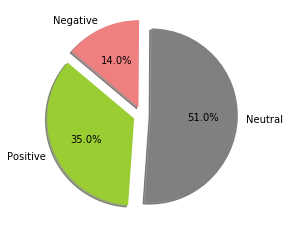

In [23]:
import pandas as pd
import numpy as np
from IPython.display import display

extractor = twitter_init()

# Grab Twit
tweets = extractor.search(q="Wibu",lang="en",count="200")
print("Jumlah Tweet: {}.\n".format(len(tweets)))


# Simpan dan manage data
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])
data['length']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

display(data.head(200)) #Menampilkan data

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

print("Persentasi tweet positif: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Persentasi tweet netral: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Persentasi tweet negatif: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

showPieChart(positive=len(pos_tweets),neutral=len(neu_tweets),negative=len(neg_tweets))